In [1]:
from random import randrange
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd

##### Custom-Timer 

In [2]:
from time import perf_counter

class TimerError(Exception):
    """A Custom Error"""

class Timer:
    """Create a new Timer() object"""
    def __init__(self):
        self._start = None
        self._elapsed = None
    def start(self):
        """Start a new Timer"""
        if self._start != None:
            raise TimerError("Timer is running. Use .stop() to reset the timer")
        self._start = perf_counter()
    def stop(self):
        """Save the elapsed time and reset the timer"""
        if self._start == None:
            raise TimerError("Timer is not running. Use .start() to start a new Timer")
        self._elapsed = perf_counter() - self._start
        self._start = None
    def elapsed(self):
        """Report elapsed time"""
        if self._elapsed == None:
            raise TimerError("Timer has not started yet. Use .start() to start a new Timer")
        return self._elapsed
    def __str__(self):
        return str(self.elapsed())

### 1. Graph 
Web graphs

In [3]:
with open('./Data_Set_Web_Graphs.txt', 'r') as f:
    edge_list = list(map(lambda x: tuple(map(int, x.split())), f.readlines()))
    adj_list = defaultdict(list)
    for edge in edge_list:
        adj_list[edge[0]].append(edge[1])

- #### Reachability
Find out how many clicks your favorite webpage is from the given home page.

In [4]:
#BFS Traversal
def Clicks(adj_list: dict) -> None:
    visited = {i: False for i in range(6301)}

    with open('./reachability.csv', 'w') as f:
        f.write(f'Home Page,Webpage,Clicks\n')

    for node in adj_list:
        if not visited[node]:
            path = {i: 0 for i in range(6301)}
            queue = []
            queue.append(node)
            visited[node] = True
            
            with open('./reachability.csv', 'a') as f:
                f.write(f'{node},{node},{0}\n')
                while queue:
                    head = queue.pop(0)
                    if head in adj_list:
                        for neighbour in adj_list[head]:
                            if not visited[neighbour]:
                                visited[neighbour] = True
                                path[neighbour] = path[head] + 1
                                queue.append(neighbour)
            
                for i in path:
                    if path[i] != 0:
                        f.write(f'{node},{i},{path[i]}\n')

Clicks(adj_list)
df = pd.read_csv('./reachability.csv')
df.sample(10)

,Home Page,Webpage,Clicks
4651,0,4913,7
5104,0,5366,8
3843,0,4095,6
1436,0,1610,7
4184,0,4439,7
3724,0,3976,5
1642,0,1849,5
3756,0,4008,9
260,0,279,5
6135,1117,1119,1


- #### Topological Ordering
Is it possible to linearly order a huge network of webpages?

In [5]:
#DFS Traversal
def topological(adj_list):
    indegree = {i:0 for i in range(6301)}
    for i in adj_list:
        for j in adj_list[i]:
            indegree[j] += 1
    
    while indegree:
        l = [i for i in indegree if not indegree[i]]
        if l == []:
            break
        l = l[0]
        print(l, '', end='', sep=' -> ')
        if l in adj_list:
            for i in adj_list[l]:
                indegree[i] -= 1
        indegree.pop(l)

topological(adj_list)

0 -> 1 -> 6 -> 22 -> 26 -> 44 -> 46 -> 52 -> 66 -> 70 -> 72 -> 74 -> 98 -> 109 -> 192 -> 194 -> 236 -> 24 -> 237 -> 239 -> 242 -> 245 -> 310 -> 316 -> 317 -> 319 -> 320 -> 366 -> 399 -> 403 -> 408 -> 410 -> 417 -> 421 -> 428 -> 431 -> 439 -> 441 -> 444 -> 445 -> 447 -> 516 -> 517 -> 519 -> 525 -> 537 -> 539 -> 543 -> 545 -> 546 -> 636 -> 639 -> 641 -> 644 -> 647 -> 653 -> 719 -> 723 -> 752 -> 775 -> 797 -> 896 -> 899 -> 903 -> 905 -> 929 -> 934 -> 936 -> 948 -> 949 -> 950 -> 961 -> 964 -> 966 -> 992 -> 994 -> 999 -> 1008 -> 1075 -> 1080 -> 1083 -> 1098 -> 1099 -> 1101 -> 1108 -> 1110 -> 1111 -> 1112 -> 1113 -> 1117 -> 1119 -> 1121 -> 1161 -> 1181 -> 1182 -> 1183 -> 1185 -> 1186 -> 1187 -> 1188 -> 1189 -> 1190 -> 1200 -> 1201 -> 1204 -> 1205 -> 1206 -> 1207 -> 1218 -> 1000 -> 1222 -> 1225 -> 1226 -> 1237 -> 1238 -> 1241 -> 1242 -> 1244 -> 1247 -> 1260 -> 1263 -> 1286 -> 1293 -> 1294 -> 1296 -> 1298 -> 1307 -> 1308 -> 1312 -> 1314 -> 1315 -> 1398 -> 1399 -> 1403 -> 1406 -> 1410 -> 1445 -

Topological sort is only applicable on Directed Acyclic Graph (DAG). Since, this dataset contains cycles, the algorithm stops midway. 

- #### Webpage Navigation
Find the strongly connected components in the graph.

In [6]:
#Kosaraja's Algorithm
def find_stronglly_connected(adj_list: dict) -> None:
    visited = {i: False for i in range(6301)}
    nodes = list(adj_list.keys())
    stack = []
    for node in nodes:
        if not visited[node]:
            DFS(adj_list, visited, node, stack)

    with open('./strongly_connected.csv', 'w') as f:
        f.write('Components,Nodes\n')
        
    rev_graph = reverse_graph(edge_list)
    visited = {i: False for i in range(6301)}
    
    with open('./strongly_connected.csv', 'a') as f:
        while stack:
            i = stack.pop()
            grp = []
            if not visited[i]:
                DFS(rev_graph, visited, i, grp)
                component = str(list(reversed(grp))).replace(', ', '-')
                n = len(component.split('-'))
                f.write(f'{component},{n}\n')
                

def DFS(adj_list: dict, visited: dict, v: int, stack: list) -> None:
    visited[v] = True

    if v in adj_list:
        for neighbour in adj_list[v]:
            if not visited[neighbour]:
                DFS(adj_list, visited, neighbour, stack)
    stack.append(v)

def reverse_graph(edge_list: list) -> dict:
    rev_graph = defaultdict(list)
    for edge in edge_list:
        rev_graph[edge[1]].append(edge[0])
    return rev_graph

find_stronglly_connected(adj_list)
df = pd.read_csv('./strongly_connected.csv')
print(df.sample(10))
print('No of SCCs:', df.shape[0])

     Components  Nodes
1623     [5125]      1
2777     [2968]      1
2480     [1623]      1
1794     [4383]      1
587      [4994]      1
3330      [214]      1
917      [3493]      1
2877     [4868]      1
1092      [941]      1
2583     [2422]      1
No of SCCs: 4234


- #### Bi-Connected Components
Find articulation points and using it find the components

In [25]:
size = 6301
Time = 0
Count = 0

def bi_connected_init(adj_list, u, parent, low, disc, st): 
    children = 0
    global Time
    global Count

    disc[u] = Time 
    low[u] = Time 
    Time += 1

    for v in adj_list[u]: 
        if disc[v] == -1 : 
            parent[v] = u 
            children += 1
            st.append((u, v))
            bi_connected_init(adj_list,v, parent, low, disc, st) 

            low[u] = min(low[u], low[v]) 
        
            if parent[u] == -1 and children > 1 or parent[u] != -1 and low[v] >= disc[u]: 
                Count += 1
                w = -1
                l = []
                while w != (u, v): 
                    w = st.pop() 
                    temp = str(w).replace(', ','-') 
                    l.append(temp)
                n = len(l)
                with open('./biconnected.csv', 'a') as f:
                    l = str(l).replace(', ', ' | ')
                    f.write(f'{l},{n}\n')
            
        elif v != parent[u] and low[u] > disc[v]: 
            low[u] = min(low [u], disc[v]) 
            st.append((u, v)) 
  
def bi_connected(adj_list): 
    global Count    

    disc = [-1] * (size) 
    low = [-1] * (size) 
    parent = [-1] * (size) 
    st = [] 

    for i in range(size): 
        if disc[i] == -1: 
            bi_connected_init(adj_list,i, parent, low, disc, st) 

        if st: 
            Count = Count + 1
            l=[]
            while st: 
                w = st.pop()
                temp = str(w).replace(', ','-') 
                l.append(temp)
            n = len(l)
            with open('./biconnected.csv', 'a') as f:
                l = str(l).replace(', ', ' | ')
                f.write(f'{l},{n}\n')
with open('./biconnected.csv', 'w') as f:
    f.write(f'Components,Edges\n')
bi_connected(adj_list)
df = pd.read_csv('./biconnected.csv')
print(df.sample(10))
print ("Above are %d biconnected components in graph." %(Count))

                                             Components  Edges
1353                                     ['(473-3205)']      1
1497                                    ['(3235-4622)']      1
2835                                    ['(3626-1262)']      1
3864  ['(410-417)' | '(410-414)' | '(410-412)' | '(4...      4
3252                                    ['(5171-5676)']      1
2748                                    ['(4669-5416)']      1
3005                                    ['(3160-4561)']      1
3965                     ['(1403-1406)' | '(1403-132)']      2
1441                                    ['(4875-3395)']      1
2409                                    ['(4492-5322)']      1
Above are 4039 biconnected components in graph.


### 2. Sorting 
Implement bubble sort algorithm

In [39]:
def bubble_sort(arr: list) -> None:
    n = len(arr)
    for i in range(n):
        swapped = False
        for j in range(n - 1 - i):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        if not swapped:
            break
    
arr = [randrange(1000) for _ in range(10)]

print("Array before sorting:", *arr)
bubble_sort(arr)
print("Array after sorting:", *arr)

Array before sorting: 120 741 348 697 227 549 871 555 411 647
Array after sorting: 120 227 348 411 549 555 647 697 741 871


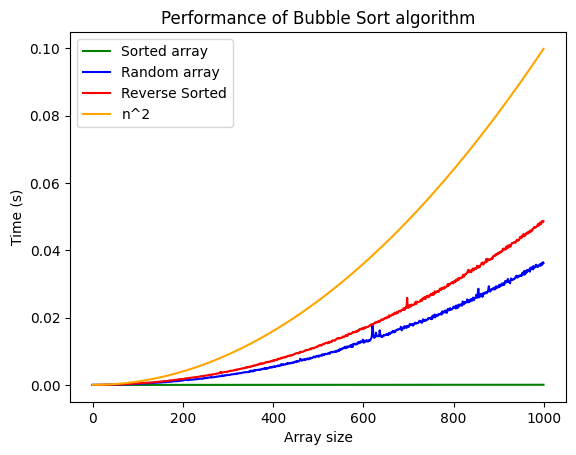

In [49]:
n = 1000
x = [i for i in range(n)]
y1 = [(i**2) * 1e-7 for i in range(n)]
y_best = []
y_avg = []
y_worst = []

rev_arr = []
sorted_arr = []
for i in range(n):
    arr = [randrange(n) for j in range(i)]
    arr.sort()
    sorted_arr.append(arr)
    rev_arr.append(list(reversed(arr)))


for i in range(n):
    t = Timer()
    t.start()
    bubble_sort(sorted_arr[i])
    t.stop()
    y_best.append(t.elapsed())

for i in range(n):
    arr_avg = [randrange(n) for j in range(i)]
    t = Timer()
    t.start()
    bubble_sort(arr_avg)
    t.stop()
    y_avg.append(t.elapsed())

for i in range(n):
    t = Timer()
    t.start()
    bubble_sort(rev_arr[i])
    t.stop()
    y_worst.append(t.elapsed())

plt.plot(x, y_best, color = 'green', label = 'Sorted array')
plt.plot(x, y_avg, color = 'blue', label = 'Random array')
plt.plot(x, y_worst, color = 'red', label = 'Reverse Sorted')
plt.plot(x, y1, color = 'orange', label = 'n^2')

plt.xlabel('Array size')
plt.ylabel('Time (s)')
plt.title('Performance of Bubble Sort algorithm')

plt.legend()
plt.show()